 ## Inventory & Sales Analytics Platform (MongoDB Project)
### This project is designed to showcase your understanding of NoSQL database design, data relationships, querying, aggregation, and performance optimization using MongoDB applied to a real-world retail business scenario.

## Project Overview
### Create a MongoDB-powered inventory and sales tracking system for a small retail business. The project should demonstrate how to store, manage, and analyze sales and inventory data to derive meaningful market insights, support business decisions, and optimize operations.

In [24]:
# Importing libraries needed for the project

from pymongo import MongoClient
from datetime import datetime, timedelta
import pandas as pd
from faker import Faker
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [25]:
# Connecting to mongodb client and creating a database
client = MongoClient("mongodb://localhost:27017/")
db = client["marketmart_db"]

# Initializing the faker library to generate sample data
fake = Faker()

import pprint as pp

# This code is used as a unified print to run my code in a list format
def print_result(cursor):
    _list = list(cursor)
    len_list = len(_list)
    print(f"Total documents: {len_list}") 
    pp.pprint(_list)

## Database Structure
### Collections to Create:
#### products – List of all items sold
#### categories – Product categorization
#### suppliers – Supplier details
#### customers – Customer profiles
#### sales – Each sale transaction
#### inventory – Current stock per product
#### restocks – Product restocking records

In [26]:
products_collection = db["products"]
sales_collection = db["sales"]
inventory_collection = db["Inventory"]
customers_collection = db["Customers"]
restock_logs_collection = db["RestockLogs"]


In [16]:
# Creating of products collections to house the product data & creation of a sample document structure
products_collection = db["products"]

products_data = {
    "_id": 1,
    "productID": "PROD001",
    "name": "Paracetamol 500mg",
    "category": "Health",
    "price": 100,
    "supplier": "JamesVendor",
    "unit": "pack",
    "createdAt": datetime(2023,1,1),
    "isActive": True
}
result = products_collection.insert_one(products_data)
print(f"Document Inserted ID:", result.inserted_id)



Document Inserted ID: 1


In [36]:
# Creating of sales collections to house the product data & creation of a sample document structure
sales_collection = db["sales"]

sales_data = {
    "_id": 1,
    "sales_id": "SAL_01",
    "customerID": "CUST005",
    "items": [{
        "productID": "PROD001", 
        "quantity": 2, 
        "unitprice": 100
    }],
    "totalAmount": 200,
    "salesDate": datetime(2023,1,1,13,50,31),
    "paymentMethod": "Cash"
}
result = sales_collection.insert_one(sales_data)
print("Document Inserted ID:", result.inserted_id)

Document Inserted ID: 1


In [ ]:
# Task Insert 30 products data
# Data generated which is inserted into the products_collection 

product_names = [
    "Paracetamol 500mg","Vitamin C Tablets", "Cough Syrup","Ibuprofen 200mg", "Antacid Tablets", "Toothpaste 100ml",
    "Toothbrush Medium","Shampoo 250ml", "Body Lotion", "Antiseptic Liquid", "Bottled Water 75cl", "Orange Juice 1L",
    "Soft Drink Can","Energy Drink","Chocolate Milk","Laundry Detergent", "Toilet Paper (4 rolls)", "Rice 5kg", "Cooking Oil 1L","Margarine 250g"]

categories = ["Health", "Personal Care","Beverages", "Household", "Groceries","Baby Care","Snacks", "Stationery","Cleaning Supplies","Pet Supplies"]
suppliers = [ "JamesVendor","HealthFirst Supplies","FreshDrop Distributors", "CarePlus Wholesale"]
units = [ "pack","bottle","can", "sachet","piece"]

# Collect products into a list
products_data = []

for i in range(40):
    product = {
        "_id": i + 2,
        "productID": f"PROD{str(i + 2).zfill(3)}",
        "name": random.choice(product_names),
        "category": random.choice(categories),
        "supplier": random.choice(suppliers),
        "price": round(random.uniform(200, 1500), 2),
        "unit": random.choice(units),
        "createdAt": datetime.now() - timedelta(days=random.randint(1, 720)),
        "isActive": True
    }
    products_data.append(product)

# Insert all documents at once
result = products_collection.insert_many(products_data)
print(f"Inserted {len(result.inserted_ids)} documents.")

# Fetch and print all inserted products
all_products = list(products_collection.find())
print("Total documents:", len(all_products))
for product in all_products:
    print(product)



Inserted 40 documents.
Total documents: 41
{'_id': 1, 'productID': 'PROD001', 'name': 'Paracetamol 500mg', 'category': 'Health', 'price': 100, 'supplier': 'JamesVendor', 'unit': 'pack', 'createdAt': datetime.datetime(2023, 1, 1, 0, 0), 'isActive': True}
{'_id': 2, 'productID': 'PROD002', 'name': 'Ibuprofen 200mg', 'category': 'Personal Care', 'supplier': 'CarePlus Wholesale', 'price': 313.64, 'unit': 'piece', 'createdAt': datetime.datetime(2024, 2, 25, 22, 26, 33, 438000), 'isActive': True}
{'_id': 3, 'productID': 'PROD003', 'name': 'Orange Juice 1L', 'category': 'Stationery', 'supplier': 'JamesVendor', 'price': 497.71, 'unit': 'piece', 'createdAt': datetime.datetime(2024, 6, 26, 22, 26, 33, 438000), 'isActive': True}
{'_id': 4, 'productID': 'PROD004', 'name': 'Antacid Tablets', 'category': 'Personal Care', 'supplier': 'JamesVendor', 'price': 1200.92, 'unit': 'piece', 'createdAt': datetime.datetime(2025, 2, 3, 22, 26, 33, 438000), 'isActive': True}
{'_id': 5, 'productID': 'PROD005', 'n

In [37]:
# Task Insert 50 sales records
# Data generated which is inserted into the sales_collection 

# collect sales data into a list
sales_data = []

for i in range(50):
    # 🔹 Pick a random product
    product = products_collection.aggregate([{"$sample": {"size": 1}}]).next()
    
    quantity = random.randint(1, 4)
    unitprice = product["price"]
    product_id = product["productID"]
    total = quantity * unitprice

    sales = {
        "_id": i + 2,
        "sales_id": f"SAL_02{i+1}",
        "customerID": f"CUST{str(random.randint(1, 20)).zfill(3)}",
        "items": [{
            "productID": product_id,
            "quantity": quantity,
            "unitprice": unitprice,
            "totalAmount": total
        }],
        "totalAmount": total,
        "salesDate": datetime.now() - timedelta(days=random.randint(1, 720)),
        "paymentMethod": random.choice(["cash", "transfer", "card"])
    }
    sales_data.append(sales)
    
# Insert all documents at once
result = sales_collection.insert_many(sales_data)
print(f"Inserted {len(result.inserted_ids)} documents.")

# Fetch and print all inserted products
all_sales = list(sales_collection.find())
print("Total documents:", len(all_sales))
for sale in all_sales:
    print(sale)
    

Inserted 50 documents.
Total documents: 51
{'_id': 1, 'sales_id': 'SAL_01', 'customerID': 'CUST005', 'items': [{'productID': 'PROD001', 'quantity': 2, 'unitprice': 100}], 'totalAmount': 200, 'salesDate': datetime.datetime(2023, 1, 1, 13, 50, 31), 'paymentMethod': 'Cash'}
{'_id': 2, 'sales_id': 'SAL_021', 'customerID': 'CUST007', 'items': [{'productID': 'PROD019', 'quantity': 1, 'unitprice': 426.03, 'totalAmount': 426.03}], 'totalAmount': 426.03, 'salesDate': datetime.datetime(2024, 8, 20, 13, 45, 20, 971000), 'paymentMethod': 'card'}
{'_id': 3, 'sales_id': 'SAL_022', 'customerID': 'CUST020', 'items': [{'productID': 'PROD016', 'quantity': 3, 'unitprice': 601.41, 'totalAmount': 1804.23}], 'totalAmount': 1804.23, 'salesDate': datetime.datetime(2024, 1, 26, 13, 45, 20, 972000), 'paymentMethod': 'card'}
{'_id': 4, 'sales_id': 'SAL_023', 'customerID': 'CUST001', 'items': [{'productID': 'PROD012', 'quantity': 1, 'unitprice': 1018.08, 'totalAmount': 1018.08}], 'totalAmount': 1018.08, 'salesDat

In [ ]:
# Task Insert 50 sales records
# Data generated which is inserted into the sales_collection 

# Creation of Database for customers
customers_collection = db["Customers"]

# Get unique customer IDs from sales
customer_ids = sales_collection.distinct("customerID")

customers = []

for cust_id in customer_ids:
    customer = {
        "customerID": cust_id,
        "firstName": fake.first_name(),
        "lastName": fake.last_name(),
        "email": fake.email(),
        "phone": fake.phone_number(),
        "gender": random.choice(["male", "female"]),
        "dateOfBirth": datetime.combine(
            fake.date_of_birth(minimum_age=18, maximum_age=65), datetime.min.time()
        ),  # 👈 Fix applied here
        "address": {
            "street": fake.street_address(),
            "city": fake.city(),
            "state": fake.state(),
            "postalCode": fake.postcode(),
            "country": "Nigeria"
        },
        "joinedDate": datetime.now() - timedelta(days=random.randint(30, 800)),
        "loyaltyPoints": random.randint(0, 500),
        "isActive": True,
        "preferredPaymentMethod": random.choice(["cash", "card", "transfer"])
    }
    customers.append(customer)

# Insert all customers
customers_collection.insert_many(customers)

# Print all inserted customers
all_customers = list(customers_collection.find())
print("Total documents:", len(all_customers))
for cust in all_customers:
    print(cust)


Total documents: 20
{'_id': ObjectId('685840638f1e5a54d932e384'), 'customerID': 'CUST001', 'firstName': 'William', 'lastName': 'Cooley', 'email': 'wmoore@example.com', 'phone': '5087333253', 'gender': 'female', 'dateOfBirth': datetime.datetime(1972, 10, 19, 0, 0), 'address': {'street': '61868 Shari Road Apt. 916', 'city': 'Port Ashleyland', 'state': 'Indiana', 'postalCode': '17560', 'country': 'Nigeria'}, 'joinedDate': datetime.datetime(2025, 4, 18, 18, 41, 55, 263000), 'loyaltyPoints': 39, 'isActive': True, 'preferredPaymentMethod': 'card'}
{'_id': ObjectId('685840638f1e5a54d932e385'), 'customerID': 'CUST002', 'firstName': 'Aaron', 'lastName': 'Travis', 'email': 'vcarrillo@example.org', 'phone': '461-781-4054', 'gender': 'male', 'dateOfBirth': datetime.datetime(1987, 3, 7, 0, 0), 'address': {'street': '15034 George Mills', 'city': 'West Sheilashire', 'state': 'Oregon', 'postalCode': '21750', 'country': 'Nigeria'}, 'joinedDate': datetime.datetime(2023, 8, 26, 18, 41, 55, 263000), 'loya

In [ ]:
# Task Insert inventory records
# Data generated which is inserted into the inventory_collection 

# Fetch full product documents instead of only distinct productIDs
products = list(products_collection.find())

# Create Inventory collection
inventory_collection = db["Inventory"]

inventory_docs = []
for p in products:
    inventory_docs.append({
        "productID": p["productID"],
        "stockLevel": random.randint(20, 200),
        "reorderLevel": random.randint(10, 50),
        "lastRestocked": datetime.now() - timedelta(days=random.randint(1, 30))
    })

# Insert inventory documents
inventory_collection.insert_many(inventory_docs)

# Print all inserted inventory docs
all_inventory = list(inventory_collection.find())
print("Total documents:", len(all_inventory))
for invent in all_inventory:
    print(invent)

Total documents: 41
{'_id': ObjectId('6858ec228f1e5a54d932e398'), 'productID': 'PROD001', 'stockLevel': 73, 'reorderLevel': 13, 'lastRestocked': datetime.datetime(2025, 6, 4, 6, 54, 42, 19000)}
{'_id': ObjectId('6858ec228f1e5a54d932e399'), 'productID': 'PROD002', 'stockLevel': 190, 'reorderLevel': 34, 'lastRestocked': datetime.datetime(2025, 6, 21, 6, 54, 42, 20000)}
{'_id': ObjectId('6858ec228f1e5a54d932e39a'), 'productID': 'PROD003', 'stockLevel': 125, 'reorderLevel': 49, 'lastRestocked': datetime.datetime(2025, 5, 27, 6, 54, 42, 20000)}
{'_id': ObjectId('6858ec228f1e5a54d932e39b'), 'productID': 'PROD004', 'stockLevel': 54, 'reorderLevel': 19, 'lastRestocked': datetime.datetime(2025, 6, 8, 6, 54, 42, 20000)}
{'_id': ObjectId('6858ec228f1e5a54d932e39c'), 'productID': 'PROD005', 'stockLevel': 159, 'reorderLevel': 44, 'lastRestocked': datetime.datetime(2025, 5, 25, 6, 54, 42, 20000)}
{'_id': ObjectId('6858ec228f1e5a54d932e39d'), 'productID': 'PROD006', 'stockLevel': 107, 'reorderLevel':

In [52]:
# Task Insert restocked records
# Data generated which is inserted into the restock_logs_collection 

# Fetch all products
products = list(products_collection.find())

# Create the restock logs collection
restock_logs_collection = db["RestockLogs"]

# Prepare restock log documents
restock_logs = []

for p in products:
    for i in range(10 + random.randint(0, 5)):  # 10 to 15 logs per product
        restock_logs.append({
            "productID": p["productID"],
            "restockDate": datetime.now() - timedelta(days=random.randint(10, 300)),
            "quantityAdded": random.randint(20, 100),
            "supplier": p["supplier"],
            "restockedBy": fake.name()
        })

# Insert all restock logs
restock_logs_collection.insert_many(restock_logs)

# Print summary
print(f"Inserted {len(restock_logs)} restock logs.")


Inserted 518 restock logs.


In [53]:
# Print all inserted courses
restocks_log = list(restock_logs_collection.find())
print("Total documents:", len(restock_logs))
for log in restock_logs:
    print_result(log)

Total documents: 518
Total documents: 6
['productID', 'restockDate', 'quantityAdded', 'supplier', 'restockedBy', '_id']
Total documents: 6
['productID', 'restockDate', 'quantityAdded', 'supplier', 'restockedBy', '_id']
Total documents: 6
['productID', 'restockDate', 'quantityAdded', 'supplier', 'restockedBy', '_id']
Total documents: 6
['productID', 'restockDate', 'quantityAdded', 'supplier', 'restockedBy', '_id']
Total documents: 6
['productID', 'restockDate', 'quantityAdded', 'supplier', 'restockedBy', '_id']
Total documents: 6
['productID', 'restockDate', 'quantityAdded', 'supplier', 'restockedBy', '_id']
Total documents: 6
['productID', 'restockDate', 'quantityAdded', 'supplier', 'restockedBy', '_id']
Total documents: 6
['productID', 'restockDate', 'quantityAdded', 'supplier', 'restockedBy', '_id']
Total documents: 6
['productID', 'restockDate', 'quantityAdded', 'supplier', 'restockedBy', '_id']
Total documents: 6
['productID', 'restockDate', 'quantityAdded', 'supplier', 'restockedB

## Part 3: CRUD Operations 
### 3.1 Create a function to add a new product with a unique ID and productID.
### 3.2 Create a function to add a new sale with a unique sale ID and link to an existing or random customer.
### 3.3 Create a function to update stock level of a product after restocking.
### 3.4 Create a function to deactivate a product.
### 3.5 Create a function to retrieve all active products below reorder level.

In [65]:
# Task: Add a new product to the product collection

# create a function
def add_product(name, category,supplier,price,unit, isActive = True):
    
    # fetch the last _id inserted into the collectioon to avoid duplicate
    last_product = products_collection.find_one(sort = [("_id", -1)]) # -1 is descending number
    
    # create a new unique _id 
    new_id = last_product["_id"] + 1 if last_product else 1
    
    # Generate productID
    productID = f"PROD{str(new_id).zfill(3)}"
    
    # Here is the code
    product = {
        "_id": new_id,
        "productID": productID,
        "name": name,
        "category": category,
        "supplier": supplier,
        "price": round(price, 2),
        "unit": unit,
        "createdAt": datetime.now(),
        "isActive": isActive
    }

    # Insert all documents at once
    result = products_collection.insert_one(product)
    print(f"Inserted product with _id: {result.inserted_id}")

resp = add_product("Dettol Soap", "Personal Care", "FreshSupplier", 299.99, "bar")
print(resp)


Inserted product with _id: 43
None


In [ ]:
# Task: Create a function to add a new sale with a unique sale ID and link to an existing or random customer.

# create a function
def new_sale(productID, quantity, customerID = None):
    
    # Get product by productID
    product = products_collection.find_one({"productID": productID})
    if not product:
        print("product not found")
        return
    
    # Extract price and calculate totalAmount
    unitprice = product["price"]
    totalAmount = round(quantity * unitprice, 2)
    
    # fetch the last _id inserted into the collectioon to avoid duplicate
    last_sale = sales_collection.find_one(sort = [("_id", -1)]) # -1 is descending number
    
    # create a new unique _id 
    new_id = last_sale["_id"] + 1 if last_sale else 1
    
    # Generate productID
    saleID = f"SAL{str(new_id).zfill(2)}"
    
   # If customerID is not provided, randomly select from existing customers
    if not customerID:
        customers = customers_collection.distinct("customerID")
        if not customers:
            print(" No customers available.")
            return
        customerID = random.choice(customers)

     # Create the sale document
    sale = {
        "_id": new_id,
        "saleID": saleID,
        "customerID": customerID,
        "items": [{
            "productID": productID,
            "quantity": quantity,
            "unitprice": unitprice,
            "totalAmount": totalAmount
        }],
        "totalAmount": totalAmount,
        "saleDate": datetime.now(),
        "paymentMethod": random.choice(["cash", "transfer", "card"])
    }
    # Insert into collection
    result = sales_collection.insert_one(sale)
    print(f"New SaleID added: {result.inserted_id}")

# An example without a customer1D    
resp = new_sale("PROD012", 3)
print(resp)

# An example with a customer1D    
respP = new_sale("PROD015", 4, "CUST005")
print(respP)



New SaleID added: 54
None
New SaleID added: 55
None


In [ ]:
# Task: Create a function to update stock level of a product less than 100 after restocking.

# create a function
def update_stock_level(quantityAdded=None): 
    
    # Find one random product with stockLevel < 100
    low_stock_item = inventory_collection.find_one({"stockLevel": {"$lt": 100}})
    if not low_stock_item:
        print("Low-stock inventory not found")
        return
    
    # Generate a random restock amount if not provided
    if quantityAdded is None:
        quantityAdded = random.randint(50, 100)
    
    # Update stockLevel and lastRestocked
    inventory_collection.update_one(
        {"productID": low_stock_item["productID"]}, {
            "$inc": {"stockLevel": quantityAdded},
            "$set": {"lastRestocked": datetime.now()}
        }
    )
    
    # Log the restock action in RestockLogs collection
    restock_log = {
        "productID": low_stock_item["productID"],
        "restockDate": datetime.now(),
        "quantityAdded": quantityAdded,
        "supplier": products_collection.find_one({"productID": low_stock_item["productID"]}).get("supplier", "Unknown"),
        "restockedBy": fake.name()
    }
    
    restock_logs_collection.insert_one(restock_log)

    print(f" Restocked '{low_stock_item['productID']}' with +{quantityAdded} units.")


In [28]:
update_stock_level()

✅ Restocked 'PROD001' with +62 units.


In [29]:
# Task: Create a function to deactivate a product.

def deactivate_product(productID):
    
    # find the product
    product = products_collection.find_one({"productID": productID})
    if not product:
        print(f"product with ID '{productID}' not found.")
        return
    
    # Deactivate the product change isActive from True to False
    products_collection.update_one(
        {"productID": productID},
        {"$set": {"isActive": False}}
    )
    
    print(f"Product '{productID}' has been deactivated")
    
resp = deactivate_product("PROD011")    
resp

Product 'PROD011' has been deactivated


In [ ]:
# Task: Create a function to retrieve all active products below reorder level.

def get_active_lowstock_products():
    
    # we are joining two collections together reorder level(inventory) & active products from (products)
    # Join inventory with products on productID
    
    pipeline = [
        {
            "$lookup": {
                "from": "products", # collection to join
                "localField": "productID", # Field in inventory
                "foreignField": "productID",  # Field in product
                "as": "productInfo"  # New field name to store the joined data as an array
            }
        },
        {
           "$unwind": "$productInfo"  # Flatten the joined product info 
        },
        {
            "$match": {
                "productInfo.isActive": True,
                "$expr": { # $expr allows you to compare two fields inside the same document, rather than field vs value.
                    "$lt": ["$stocklevel", "$reorderLevel"]
                }
            }
        },
        {
            "$project": {
                "_id": 0, # 0 means the field should not appear in our result query
                "productID": 1, # 1 means this field should appear in the query
                "stockLevel": 1,
                "reorderLevel": 1,
                "name": "$productInfo.name",
                "category": "$productInfo.category",
                "supplier": "$productInfo.supplier"
            }
        }
    ]
    results = list(inventory_collection.aggregate(pipeline))
    
    if results:
        print("Active Products below Reorder Level: ")
        for product in results:
            print(product)
            
    else:
        print("No active products are below the reorder level.")      
    

resp = get_active_lowstock_products()
resp

Active Products below Reorder Level: 
{'productID': 'PROD001', 'stockLevel': 135, 'reorderLevel': 13, 'name': 'Paracetamol 500mg', 'category': 'Health', 'supplier': 'JamesVendor'}
{'productID': 'PROD002', 'stockLevel': 190, 'reorderLevel': 34, 'name': 'Ibuprofen 200mg', 'category': 'Personal Care', 'supplier': 'CarePlus Wholesale'}
{'productID': 'PROD003', 'stockLevel': 125, 'reorderLevel': 49, 'name': 'Orange Juice 1L', 'category': 'Stationery', 'supplier': 'JamesVendor'}
{'productID': 'PROD004', 'stockLevel': 54, 'reorderLevel': 19, 'name': 'Antacid Tablets', 'category': 'Personal Care', 'supplier': 'JamesVendor'}
{'productID': 'PROD005', 'stockLevel': 159, 'reorderLevel': 44, 'name': 'Soft Drink Can', 'category': 'Personal Care', 'supplier': 'CarePlus Wholesale'}
{'productID': 'PROD006', 'stockLevel': 107, 'reorderLevel': 15, 'name': 'Antacid Tablets', 'category': 'Cleaning Supplies', 'supplier': 'JamesVendor'}
{'productID': 'PROD007', 'stockLevel': 87, 'reorderLevel': 45, 'name': '

## Part 4: Aggregation & Analytics Pipeline
### 4.1 Find the top 5 most sold products by total quantity.
### 4.2 List all products where current stock is below the reorder level.
### 4.3 Calculate total sales revenue per category.
### 4.4 Show monthly sales trends (month vs total sales).
### 4.5 Identify products with no sales in the last 6 months.
### 4.6 Calculate average sale value per customer.
### 4.7 Identify the most common payment method used.

In [32]:
# Task Find the top 5 most sold products by total quantity.

pipeline = [
    {"$unwind": "$items"}, # Break sales.items array into individual documents
    {
        "$group": {
            "_id": "$items.productID",    # Group by productID
            "total_quantity_sold": {"$sum": "$items.quantity"}
        }
    },
    { "$sort": {"total_quantity_sold": -1}},   # # Sort by quantity sold, descending
    {"$limit": 5 }  # Top 5 
]

top_products = list(sales_collection.aggregate(pipeline))
for product in top_products:
    print(product)

{'_id': 'PROD007', 'total_quantity_sold': 10}
{'_id': 'PROD012', 'total_quantity_sold': 10}
{'_id': 'PROD035', 'total_quantity_sold': 8}
{'_id': 'PROD037', 'total_quantity_sold': 8}
{'_id': 'PROD020', 'total_quantity_sold': 6}


In [38]:
# Task: List all products where current stock is below the reorder level.

low_stock_products = inventory_collection.find({
    "$expr": { "$lt": ["$stockLevel", "$reorderLevel"]}
})
for product in low_stock_products:
    print(product)

{'_id': ObjectId('6858ec228f1e5a54d932e3bc'), 'productID': 'PROD037', 'stockLevel': 38, 'reorderLevel': 49, 'lastRestocked': datetime.datetime(2025, 5, 28, 6, 54, 42, 20000)}


In [49]:
# Task: Calculate total sales revenue per category.

pipeline = [
    # Break the 'items' array in sales
    {"$unwind": "$items"},
      
    # Join with Products collection to get category
    {"$lookup": {
        "from": "products",
        "localField": "items.productID",
        "foreignField": "productID",
        "as": "productInfo"
        }},
    {"$unwind": "$productInfo"},
    
    # Group by category and productInfo
    {
        "$group": {
            "_id": "$productInfo.category",
            "total_revenue": {
                "$sum": {"$multiply": ["$items.quantity", "$items.unitprice"]}
            }
        }
      },
    {"$sort": {"total_revenue": -1}}
]

category_sales = list(sales_collection.aggregate(pipeline))
for cate in category_sales:
    print(f"Category: {cate['_id']}, Revenue: ₦{round(cate['total_revenue'], 2)}")

Category: Cleaning Supplies, Revenue: ₦24315.04
Category: Snacks, Revenue: ₦17436.53
Category: Stationery, Revenue: ₦10538.88
Category: Personal Care, Revenue: ₦10229.96
Category: Baby Care, Revenue: ₦10229.21
Category: Groceries, Revenue: ₦10180.8
Category: Household, Revenue: ₦8322.87
Category: Beverages, Revenue: ₦6070.03
Category: Health, Revenue: ₦4432.23
Category: Pet Supplies, Revenue: ₦1244.18


In [50]:
# Task : Show monthly sales trends (month vs total sales).

pipeline = [
    {
        "$group": {
            "_id": {
                "year": { "$year": "$salesDate" },
                "month": { "$month": "$salesDate" }
            },
            "monthly_sales": { "$sum": "$totalAmount" }
        }
    },
    {
        "$sort": {
            "_id.year": 1,
            "_id.month": 1
        }
    }
]

monthly_trends = list(sales_collection.aggregate(pipeline))

# 🔽 Print results in readable format
for month in monthly_trends:
    year = month["_id"]["year"]
    mth = month["_id"]["month"]
    sales = round(month["monthly_sales"], 2)
    print(f"{year}-{str(mth).zfill(2)}: ₦{sales}")


None-None: ₦11522.16
2023-01: ₦200
2023-07: ₦1027.28
2023-08: ₦1401.22
2023-09: ₦5387.61
2023-10: ₦4917.31
2023-11: ₦9394.88
2023-12: ₦5140.74
2024-01: ₦7537.25
2024-02: ₦1054.14
2024-03: ₦700.61
2024-05: ₦9786.92
2024-06: ₦1496.98
2024-07: ₦5893.52
2024-08: ₦2449.63
2024-09: ₦4513.73
2024-10: ₦482.0
2024-11: ₦11329.84
2024-12: ₦1604.42
2025-01: ₦2249.07
2025-02: ₦749.69
2025-03: ₦7901.42
2025-04: ₦3979.14
2025-05: ₦2280.17


In [ ]:
# Task: Identify products with no sales in the last 6 months.

# Calculate date 6 months ago
six_month_ago = datetime.now() - timedelta(days=180)

# Get all productIDs sold in the last 6 months
sold_products = sales_collection.aggregate([
    { "$match": { "salesDate": { "$gte": six_month_ago } } },
    { "$unwind": "$items" },
    { "$group": { "_id": "$items.productID" } }
])

sold_product_ids = [doc["_id"] for doc in sold_products]

# 3. Find products not in the list above
unsold_products = products_collection.find({
    "productID": { "$nin": sold_product_ids } # $nin means not in
})

# 4. Print the unsold products
print("Products with NO sales in the last 6 months:")
for product in unsold_products:
    print(f"- {product['productID']}: {product['name']}")

Products with NO sales in the last 6 months:
- PROD001: Paracetamol 500mg
- PROD002: Ibuprofen 200mg
- PROD003: Orange Juice 1L
- PROD004: Antacid Tablets
- PROD005: Soft Drink Can
- PROD006: Antacid Tablets
- PROD008: Ibuprofen 200mg
- PROD009: Vitamin C Tablets
- PROD010: Cough Syrup
- PROD011: Paracetamol 500mg
- PROD012: Shampoo 250ml
- PROD014: Toothbrush Medium
- PROD015: Rice 5kg
- PROD016: Energy Drink
- PROD017: Antacid Tablets
- PROD018: Ibuprofen 200mg
- PROD019: Bottled Water 75cl
- PROD022: Toilet Paper (4 rolls)
- PROD023: Shampoo 250ml
- PROD026: Body Lotion
- PROD027: Toothpaste 100ml
- PROD028: Antiseptic Liquid
- PROD029: Soft Drink Can
- PROD030: Antiseptic Liquid
- PROD031: Orange Juice 1L
- PROD032: Orange Juice 1L
- PROD034: Antiseptic Liquid
- PROD035: Ibuprofen 200mg
- PROD036: Bottled Water 75cl
- PROD037: Margarine 250g
- PROD038: Laundry Detergent
- PROD040: Toilet Paper (4 rolls)
- PROD041: Shampoo 250ml
- PROD042: Dettol Soap
- PROD043: Dettol Soap


In [ ]:
# Task: calculate average sale value per customer.

pipeline = [
    
    # Only keeps documents where totalAmount is not None, Think of it like cleaning bad data.
    {
        "$match": {
            "totalAmount": { "$ne": None }
        }
    },
     
    {
        "$group": {
            "_id": "$customerID", # Group by customer.
            "totalSpent": { "$sum": "$totalAmount" }, # Add up how much each customer spent.
            "numberOfSales": { "$sum": 1 } # Count how many times each customer bought something.
        }
    },
    {
        "$project": {
            "_id": 0,
            "customerID": "$_id", # Renames _id to customerID
            "totalSpent": 1,
            "numberOfSales": 1,
            "averageSaleValue": {
                "$cond": {
                    "if": { "$eq": ["$numberOfSales", 0] },
                    "then": None,
                    "else": { "$round": [{ "$divide": ["$totalSpent", "$numberOfSales"] }, 2] }
                }
            }
        }
    }
]

avg_sales_per_customer = list(sales_collection.aggregate(pipeline))

for customer in avg_sales_per_customer:
    print(f"Customer: {customer['customerID']} | Avg Sale: ₦{customer['averageSaleValue']}")


Customer: CUST009 | Avg Sale: ₦1019.78
Customer: CUST002 | Avg Sale: ₦1106.36
Customer: CUST016 | Avg Sale: ₦2011.48
Customer: CUST013 | Avg Sale: ₦1831.07
Customer: CUST019 | Avg Sale: ₦567.84
Customer: CUST008 | Avg Sale: ₦2002.03
Customer: CUST018 | Avg Sale: ₦1362.66
Customer: CUST007 | Avg Sale: ₦3094.22
Customer: CUST005 | Avg Sale: ₦1405.24
Customer: CUST012 | Avg Sale: ₦2232.05
Customer: CUST001 | Avg Sale: ₦883.88
Customer: CUST015 | Avg Sale: ₦904.12
Customer: CUST006 | Avg Sale: ₦5493.48
Customer: CUST011 | Avg Sale: ₦482.0
Customer: CUST003 | Avg Sale: ₦2957.43
Customer: CUST014 | Avg Sale: ₦2054.19
Customer: CUST004 | Avg Sale: ₦3699.48
Customer: CUST020 | Avg Sale: ₦2506.53
Customer: CUST017 | Avg Sale: ₦1380.79
Customer: CUST010 | Avg Sale: ₦1676.82


In [ ]:
# Task: Identify the most common payment method used.

pipeline = [
    {"$group": {
            "_id": "$paymentMethod",
            "count": { "$sum": 1 }}},
    {"$sort": { "count": -1 }},
    {"$limit":1}
]

most_common_method = list(sales_collection.aggregate(pipeline))

if most_common_method:
    method = most_common_method[0]
    print(f"Most common payment method: {method['_id']} (used {method['count']} times)")
else:
    print("No payment methods found.")


💳 Most common payment method: card (used 22 times)


## Create a visualization 
### Sales trends over time
### Low stock alerts
### Category-wise revenue



C:\Users\Micheal\AppData\Local\Temp\ipykernel_29980\2270598480.py:36: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  plt.tight_layout()
c:\Users\Micheal\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


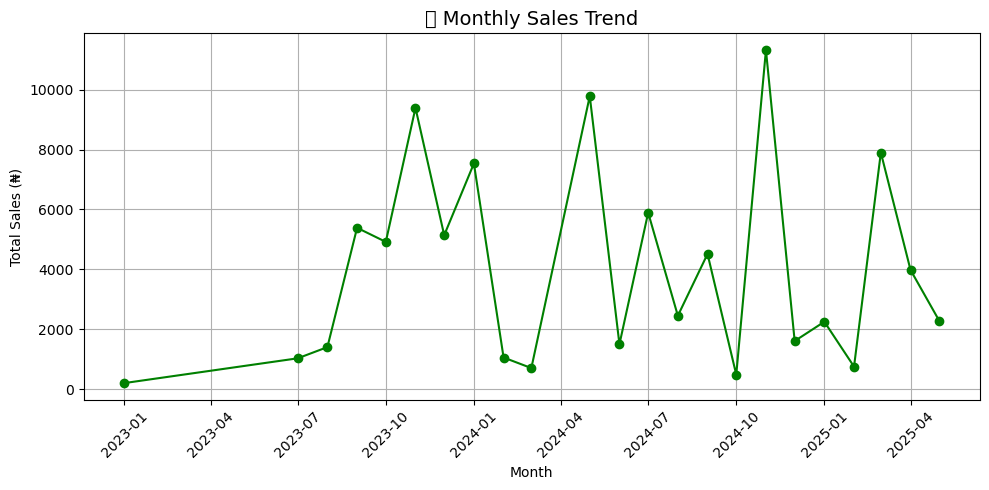

In [ ]:
#Task: create a visual for Sales trends over time

# Aggregation Pipeline for Monthly Sales Trends
pipeline = [
    {
        "$group": {
            "_id": {
                "year": {"$year": "$salesDate"},
                "month": {"$month": "$salesDate"}
            },
            "totalSales": {"$sum": "$totalAmount"}
        }
    },
    { "$sort": {"_id.year": 1, "_id.month": 1} }
]

# Run aggregation and load into DataFrame
result = list(sales_collection.aggregate(pipeline))
df = pd.DataFrame(result)

# 🛠 Format DataFrame
df["year"] = df["_id"].apply(lambda x: x["year"])
df["month"] = df["_id"].apply(lambda x: x["month"])
df["date"] = pd.to_datetime(df[["year", "month"]].assign(day=1))
df.drop(columns=["_id"], inplace=True)
df.sort_values("date", inplace=True)

# 📈 Plot the Monthly Sales Trend
plt.figure(figsize=(10, 5))
plt.plot(df["date"], df["totalSales"], marker='o', linestyle='-', color='green')
plt.title("📅 Monthly Sales Trend", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Sales (₦)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [61]:
#Task: create a visual for Low stock alerts

# Aggregation pipeline: find low stock products
pipeline = [
    {
        "$match": {
            "$expr": { "$lt": ["$stockLevel", "$reorderLevel"] }
        }
    },
    {
        "$lookup": {
            "from": "Products",
            "localField": "productID",
            "foreignField": "productID",
            "as": "productInfo"
        }
    },
    { "$unwind": "$productInfo" },
    {
        "$project": {
            "productID": 1,
            "stockLevel": 1,
            "reorderLevel": 1,
            "name": "$productInfo.name",
            "category": "$productInfo.category"
        }
    }
]

# Run aggregation and convert to DataFrame
result = list(inventory_collection.aggregate(pipeline))
df = pd.DataFrame(result)

# If there are results, plot the low stock products
if not df.empty:
    plt.figure(figsize=(10, 6))
    plt.barh(df["name"], df["stockLevel"], color='tomato')
    plt.axvline(df["reorderLevel"].mean(), color='blue', linestyle='--', label='Avg Reorder Level')
    plt.title("⚠️ Low Stock Alert: Products Below Reorder Level", fontsize=14)
    plt.xlabel("Stock Level")
    plt.ylabel("Product Name")
    plt.tight_layout()
    plt.legend()
    plt.show()
else:
    print("No products are below the reorder level.")

No products are below the reorder level.


In [ ]:
#Task: create a visual for category revenue

# Aggregation pipeline
pipeline = [
    { "$unwind": "$items" },
    {
        "$lookup": {
            "from": "Products",
            "localField": "items.productID",
            "foreignField": "productID",
            "as": "productInfo"
        }
    },
    { "$unwind": "$productInfo" },
    {
        "$group": {
            "_id": "$productInfo.category",
            "total_revenue": {
                "$sum": {
                    "$multiply": ["$items.quantity", "$items.unitprice"]
                }
            }
        }
    },
    { "$sort": { "total_revenue": -1 } }
]

# Run aggregation and convert to DataFrame
result = list(sales_collection.aggregate(pipeline))
df = pd.DataFrame(result)

# Plot category-wise revenue
if not df.empty:
    plt.figure(figsize=(10, 6))
    plt.bar(df["_id"], df["total_revenue"], color='mediumseagreen')
    plt.title("💰 Category-Wise Revenue", fontsize=14)
    plt.xlabel("Category")
    plt.ylabel("Total Revenue (₦)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No data available to plot.")

No data available to plot.
